# Analyse exploratoire et segmentation clients d'un commerce en ligne

In [ ]:
#import des librairies necessaires 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker

import sklearn.cluster
import plotly.express as px

##### Les données proviennent du site "UCI Machine Learning"

In [2]:
#import données
df = pd.read_excel('/Users/youss/Desktop/Retail_EDA/online_retail_II.xlsx')

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,525451,525452,525453,525454,525455,525456,525457,525458,525459,525460
Invoice,489434,489434,489434,489434,489434,489434,489434,489434,489435,489435,...,538171,538171,538171,538171,538171,538171,538171,538171,538171,538171
StockCode,85048,79323P,79323W,22041,21232,22064,21871,21523,22350,22349,...,22748,22745,22558,21671,20971,22271,22750,22751,20970,21931
Description,15CM CHRISTMAS GLASS BALL 20 LIGHTS,PINK CHERRY LIGHTS,WHITE CHERRY LIGHTS,"RECORD FRAME 7"" SINGLE SIZE",STRAWBERRY CERAMIC TRINKET BOX,PINK DOUGHNUT TRINKET POT,SAVE THE PLANET MUG,FANCY FONT HOME SWEET HOME DOORMAT,CAT BOWL,"DOG BOWL , CHASING BALL DESIGN",...,POPPY'S PLAYHOUSE KITCHEN,POPPY'S PLAYHOUSE BEDROOM,CLOTHES PEGS RETROSPOT PACK 24,RED SPOT CERAMIC DRAWER KNOB,PINK BLUE FELT CRAFT TRINKET BOX,FELTCRAFT DOLL ROSIE,FELTCRAFT PRINCESS LOLA DOLL,FELTCRAFT PRINCESS OLIVIA DOLL,PINK FLORAL FELTCRAFT SHOULDER BAG,JUMBO STORAGE BAG SUKI
Quantity,12,12,12,48,24,24,24,10,12,12,...,2,2,4,6,2,2,1,1,2,2
InvoiceDate,2009-12-01 07:45:00,2009-12-01 07:45:00,2009-12-01 07:45:00,2009-12-01 07:45:00,2009-12-01 07:45:00,2009-12-01 07:45:00,2009-12-01 07:45:00,2009-12-01 07:45:00,2009-12-01 07:46:00,2009-12-01 07:46:00,...,2010-12-09 20:01:00,2010-12-09 20:01:00,2010-12-09 20:01:00,2010-12-09 20:01:00,2010-12-09 20:01:00,2010-12-09 20:01:00,2010-12-09 20:01:00,2010-12-09 20:01:00,2010-12-09 20:01:00,2010-12-09 20:01:00
Price,6.95,6.75,6.75,2.1,1.25,1.65,1.25,5.95,2.55,3.75,...,2.1,2.1,1.49,1.25,1.25,2.95,3.75,3.75,3.75,1.95
Customer ID,13085.0,13085.0,13085.0,13085.0,13085.0,13085.0,13085.0,13085.0,13085.0,13085.0,...,17530.0,17530.0,17530.0,17530.0,17530.0,17530.0,17530.0,17530.0,17530.0,17530.0
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,...,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


In [4]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


On remarque que nous avons des quantités et des prix négatifs

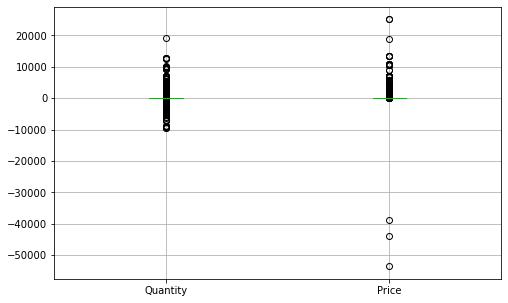

In [6]:
num_cols = ['Quantity','Price']
plt.figure(figsize=(8,5))
df[num_cols].boxplot()
plt.show()

In [7]:
Q_neg = df.Quantity[df['Quantity']<=0].count()
print ('Il y a ', Q_neg, 'lignes ou la quantité est negative ')

Il y a  12326 lignes ou la quantité est negative 


In [8]:
P_neg = df.Price[df['Price']<=0].count()
print ('Il y a ', P_neg, 'lignes ou le prix est negatif ')

Il y a  3690 lignes ou le prix est negatif 


In [ ]:
df.isna().sum()

###### je vais me debarasser des lignes qui contiennent des valeurs negatives.

In [9]:
df = df.drop(df[df.Quantity < 0].index)
df = df.drop(df[df.Price < 0].index)
df.shape

(513132, 8)

###### 12 329 lignes au total ont été supprimées pour 513 132 lignes restantes

Je convertis le string en format datetime avant de creer une nouvelle colonne qui nous servira à connaitre les mois les plus prolifiques

In [10]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

df['Date_Mois'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Date_Jours'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month + date.day)

In [11]:
# Le prix dans notre df est unitaire
df["Revenus"] = df["Quantity"] * df["Price"]
df_revenus = df.groupby(['Date_Mois']).agg({'Revenus': sum, 'Invoice': pd.Series.nunique}).reset_index()


In [12]:
df_revenus

,Date_Mois,Revenus,Invoice
0,200912,825685.760,1839
1,201001,652708.502,1205
2,201002,553713.306,1282
3,201003,833570.131,1770
4,201004,681528.992,1512
5,201005,659858.860,1642
6,201006,752270.140,1719
7,201007,650712.940,1584
8,201008,697274.910,1511
9,201009,924333.011,1911


In [13]:
df_revenus.Revenus = pd.to_numeric(df_revenus.Revenus)
df_revenus.Invoice = pd.to_numeric(df_revenus.Invoice)

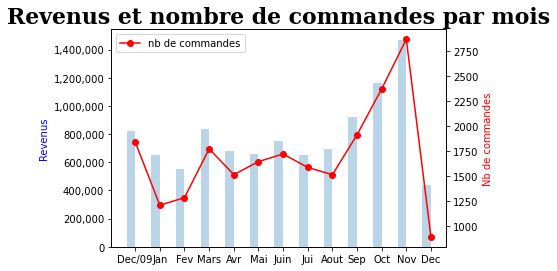

In [14]:
x = np.arange(len(df_revenus.Date_Mois))  
X = ['Dec/09','Jan','Fev','Mars','Avr','Mai','Juin','Jui','Aout','Sep','Oct','Nov','Dec']

width = 0.35  

fig, ax1 = plt.subplots()

ax1.bar(x - width/2, df_revenus.Revenus,width, alpha = 0.3)
ax1t = ax1.twinx()

ax1t.plot( df_revenus.Invoice,  marker = 'o', label='nb de commandes', color='red')



ax1.set_title('Revenus et nombre de commandes par mois', fontfamily = 'serif',fontweight = 'bold',fontsize=22)
ax1.set_ylabel('Revenus', color = 'blue')
ax1t.set_ylabel('Nb de commandes', color = 'red')


ax1.set_xticks(x)
ax1.set_xticklabels(X)

ax1t.legend()

ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.rcParams["figure.figsize"] = (11,4)

On peut remarquer que les revenus ainsi que le nombre de commandes augmentent en Septembre Octobre et Novembre, cela me semble etre du à l'approche des fetes de fin d'annees.
Je vais maintenant voir si le prix du panier moyen a également augmenté durant cette meme periode.

### Prix du panier moyen

Text(0.5, 1.0, 'Panier moyen')

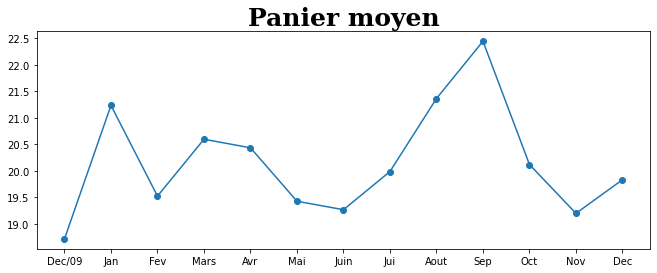

In [15]:
panier_m = df.groupby('Date_Mois')['Revenus'].mean().reset_index()

x = np.arange(len(panier_m.Date_Mois))  
X = ['Dec/09','Jan','Fev','Mars','Avr','Mai','Juin','Jui','Aout','Sep','Oct','Nov','Dec']

fig, ax = plt.subplots()

ax.plot(panier_m.Revenus, marker = 'o')


ax.set_xticks(x)
ax.set_xticklabels(X)

ax.set_title('Panier moyen',fontfamily = 'serif', fontweight = 'bold', fontsize =25)

###### Septembre est le mois pendant lequel le panier moyen atteint son maximum, cependant il decroit ensuite considerablement,                                                             La hausse des revenus pendant les mois qui suivent semble donc découler de l'augmentation du nombre de commandes uniquement. 

###### Repartition des revenus par pays (top5)

<ipython-input-16-ec748472db0b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels( top_pays_r.Revenus,fontsize=15)


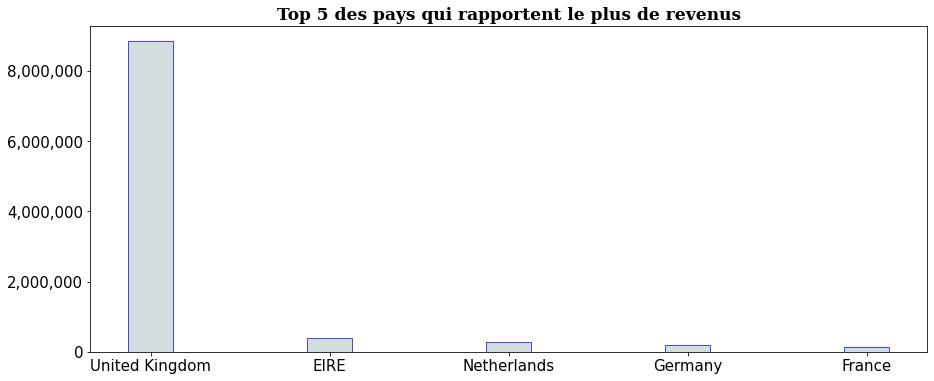

In [16]:
pays_r = df.groupby('Country')['Revenus'].sum().sort_values(ascending=False).reset_index()

top_pays_r = pays_r.nlargest(5, columns='Revenus')

fig, ax = plt.subplots(1,1, figsize=(15, 6))

ax.bar(top_pays_r.index, top_pays_r.Revenus, width=0.25, 
       edgecolor='blue', color='#d4dddd',
       linewidth=0.7)

x = np.arange(len(top_pays_r.Country))

ax.set_title('Top 5 des pays qui rapportent le plus de revenus', fontfamily='serif', fontsize=17, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(top_pays_r.Country, fontsize=15)
ax.set_yticklabels( top_pays_r.Revenus,fontsize=15)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

###### Repartition des clients selon leur pays (top 5)

[Text(0, 0, 'United Kingdom'),
 Text(1, 0, 'Germany'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Spain'),
 Text(4, 0, 'Netherlands')]

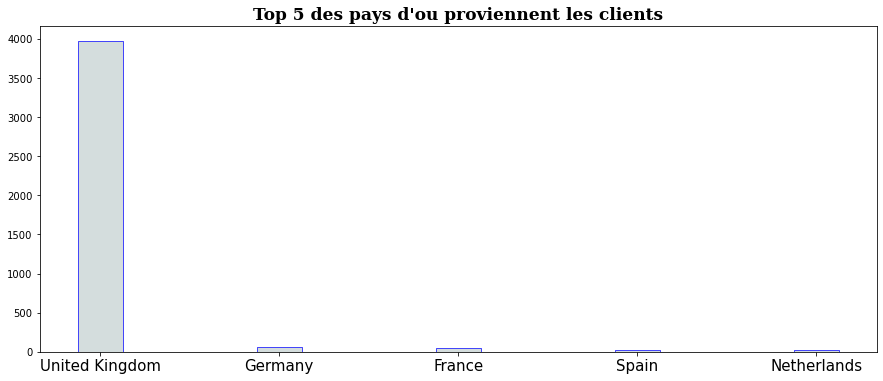

In [17]:
pays_c = df.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False).reset_index()

top_pays_c = pays_c.nlargest(5, columns='Customer ID')


fig, ax = plt.subplots(1,1, figsize=(15, 6))

ax.bar(top_pays_c.index, top_pays_c['Customer ID'], width=0.25, 
       edgecolor='blue', color='#d4dddd',
       linewidth=0.7)

x = np.arange(len(top_pays_c['Customer ID']))

ax.set_title('Top 5 des pays d\'ou proviennent les clients', fontfamily='serif', fontsize=17, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(top_pays_c.Country, fontsize=15)


##### On peut remarquer que l'écrasante majorité des revenus et des clients proviennent du Royaume Uni.

Je vais maintenant proceder à la segmentation des clients via la méthode RFM, R pour récence, F pour fréquence et M pour montant.

La segmentation des clients est tres utile et permet un marketing ciblé.


Je vais selectionner les transactions en provenance du Royaume Uni uniquement afin d'avoir des résultats plus cohérents.

# Segmentation RFM

In [18]:
uk = df.query("Country=='United Kingdom'").reset_index(drop=True)

### Recence

In [19]:
df_clients = pd.DataFrame(df['Customer ID'].unique())
df_clients.columns = ['Customer ID']



In [20]:
date_achat_max = uk.groupby('Customer ID').InvoiceDate.max().reset_index()
date_achat_max.columns = ['Customer ID','date_achat_max']

date_achat_max['Recence'] = (date_achat_max['date_achat_max'].max() - date_achat_max['date_achat_max']).dt.days

df_clients = pd.merge(df_clients, date_achat_max[['Customer ID','Recence']], on='Customer ID')



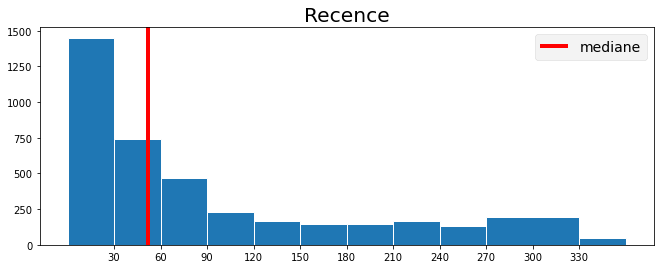

In [21]:
#visualisation

x = np.arange(len(df_clients['Customer ID']))

bins = [0,30, 60, 90, 120, 150, 180, 210, 240, 270, 330, 360]

plt.hist(df_clients['Recence'], bins = bins , edgecolor = 'white')

plt.style.use('fivethirtyeight')

plt.title('Recence')
plt.xticks(np.arange(30, 360, 30))

#mediane 

med = df_clients['Recence'].median()

plt.axvline(med, color='red', label = 'mediane')
plt.legend()

In [22]:
df_clients.describe()

,Customer ID,Recence
count,3971.000000,3971.000000
mean,15560.853941,90.200705
std,1581.913468,97.161543
min,12346.000000,0.000000
25%,14200.500000,17.000000
50%,15575.000000,52.000000
75%,16940.500000,135.000000
max,18287.000000,373.000000


## Segmentation via K-means de la recence

K-means est un algorithme non supervisé de clustering .
Il permet de regrouper en K clusters distincts les observations du data set. 
Ainsi les données similaires se retrouveront  dans un même cluster. Par ailleurs, une observation ne peut se retrouver que dans un cluster à la fois (exclusivité d’appartenance).
Pour choisir le nombre de clusters K, je vais utiliser la methode du coude ci dessous.
Généralement, le point du coude est celui du nombre de clusters à partir duquel la variance ne se réduit plus significativement.
Ce point sera le nombre optimal de clusters

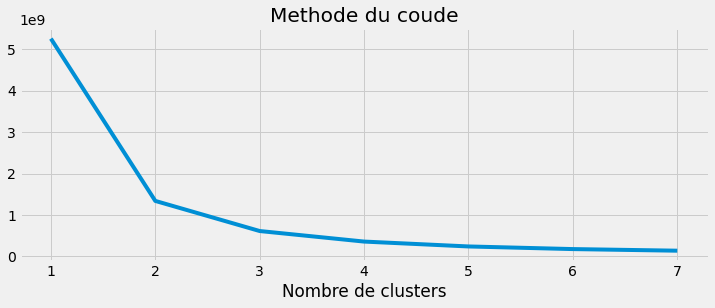

In [23]:
from sklearn.cluster import KMeans

recence = df_clients['Recence'].reset_index()

clust = []

for k in range (1,8):
    kmeans = KMeans(n_clusters = k, max_iter = 1000)
    kmeans.fit(recence)
    clust.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(1,8), clust)
plt.title('Methode du coude')
plt.xlabel('Nombre de clusters')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_clients[['Recence']])
df_clients['Cluster_recence'] = kmeans.predict(df_clients[['Recence']])
df_clients.head()

,Customer ID,Recence,Cluster_recence
0,13085.0,314,2
1,13078.0,1,1
2,15362.0,83,0
3,18102.0,0,1
4,18087.0,14,1


In [25]:
df_clients.groupby('Cluster_recence')['Recence'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster_recence,,,,,,,,
0,1015.0,80.515271,23.339437,51.0,62.0,73.0,98.00,135.0
1,1966.0,19.793998,14.239993,0.0,8.0,17.0,30.00,50.0
2,418.0,306.868421,40.072768,252.0,272.0,301.0,356.00,373.0
3,572.0,191.045455,31.786030,136.0,164.0,189.0,217.25,247.0


In [26]:
#function for ordering cluster numbers
def tri_cluster(cluster, champs,df,ascending):
    cluster_nv = 'nv' + cluster
    df_new = df.groupby(cluster)[champs].mean().reset_index()
    df_new = df_new.sort_values(by=champs,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster,'index']], on=cluster)
    df_final = df_final.drop([cluster],axis=1)
    df_final = df_final.rename(columns={"index":cluster})
    return df_final

In [27]:
df_clients = tri_cluster('Cluster_recence', 'Recence',df_clients,False)

## Segmentation selon la frequence 

In [28]:
#get order counts for each user and create a dataframe with it
frequence = uk.groupby('Customer ID').InvoiceDate.count().reset_index()
frequence.columns = ['Customer ID','Frequence']

#add this data to our main dataframe
df_clients = pd.merge(df_clients, frequence, on='Customer ID')


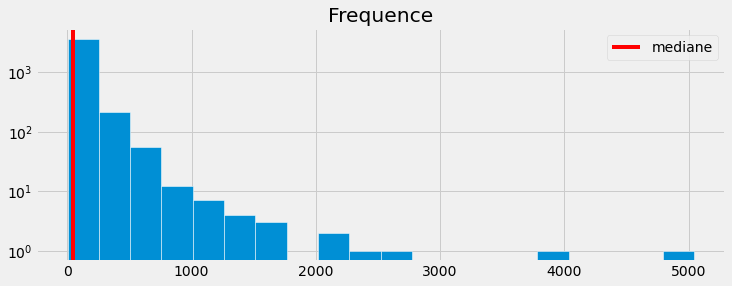

In [29]:
#visualisation

x = np.arange(len(df_clients['Frequence']))


plt.hist(df_clients['Frequence'] ,bins = 20, edgecolor = 'white', log=True)

plt.style.use('fivethirtyeight')

plt.title('Frequence')
plt.xticks()

#mediane 

med = df_clients['Frequence'].median()

plt.axvline(med, color='red', label = 'mediane')
plt.legend()

In [30]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_clients[['Frequence']])
df_clients['Cluster_frequence'] = kmeans.predict(df_clients[['Frequence']])
df_clients.head()

,Customer ID,Recence,Cluster_recence,Frequence,Cluster_frequence
0,13085.0,314,0,62,0
1,15413.0,326,0,25,0
2,17592.0,373,0,13,0
3,17056.0,373,0,8,0
4,13526.0,373,0,44,0


In [31]:
df_clients.groupby('Cluster_frequence')['Frequence'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster_frequence,,,,,,,,
0,3310.0,44.367674,36.869243,1.0,15.00,33.0,66.75,147.0
1,82.0,761.134146,282.709019,509.0,578.25,653.0,813.00,1729.0
2,6.0,3061.000000,1158.777114,2055.0,2326.50,2566.5,3558.00,5043.0
3,573.0,250.113438,86.091446,148.0,181.00,228.0,296.00,500.0


In [44]:
df_clients = tri_cluster('Cluster_frequence', 'Frequence',df_clients,True)


### Segmentation selon le montant des transactions

In [33]:
uk['Revenus'] = uk['Price'] * uk['Quantity']
montant = uk.groupby('Customer ID').Revenus.sum().reset_index()

df_clients = pd.merge(df_clients, montant, on='Customer ID')

In [34]:
df_clients.head()

,Customer ID,Recence,Cluster_recence,Frequence,Cluster_frequence,Revenus
0,13085.0,314,0,62,3,2017.20
1,15413.0,326,0,25,3,6798.72
2,17592.0,373,0,13,3,148.30
3,17056.0,373,0,8,3,128.60
4,13526.0,373,0,44,3,1182.00


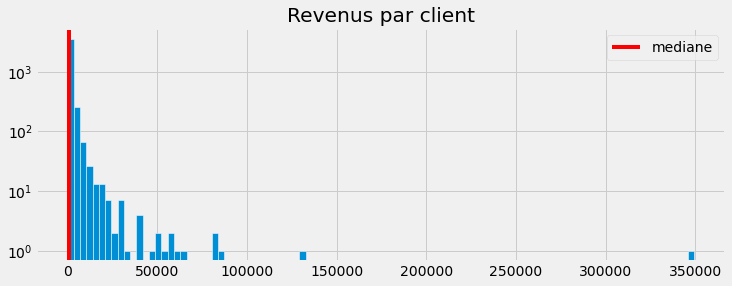

In [35]:
#visualisation

x = np.arange(len(df_clients['Revenus']))


plt.hist(df_clients['Revenus'] ,bins = 100, edgecolor = 'white', log = True)

plt.style.use('fivethirtyeight')

plt.title('Revenus par client')
plt.xticks()

#mediane 

med = df_clients['Revenus'].median()

plt.axvline(med, color='red', label = 'mediane')
plt.legend()

In [36]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_clients[['Revenus']])
df_clients['Cluster_Montant'] = kmeans.predict(df_clients[['Revenus']])
df_clients.describe()

,Customer ID,Recence,Cluster_recence,Frequence,Cluster_frequence,Revenus,Cluster_Montant
count,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.0000
mean,15560.853941,90.200705,2.140519,93.415009,2.809872,1867.226382,0.1103
std,1581.913468,97.161543,1.020148,183.278691,0.452102,7379.089721,0.5570
min,12346.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000
25%,14200.500000,17.000000,2.000000,18.000000,3.000000,304.110000,0.0000
50%,15575.000000,52.000000,2.000000,43.000000,3.000000,669.850000,0.0000
75%,16940.500000,135.000000,3.000000,102.000000,3.000000,1655.135000,0.0000
max,18287.000000,373.000000,3.000000,5043.000000,3.000000,349164.350000,3.0000


In [37]:
df_clients.groupby('Cluster_Montant')['Revenus'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster_Montant,,,,,,,,
0,3819.0,1133.525221,1272.325485,0.00,293.895,633.99,1492.260,7021.66
1,1.0,349164.350000,NaN,349164.35,349164.350,349164.35,349164.350,349164.35
2,16.0,61273.691875,24068.562294,38683.02,45629.460,54212.78,69247.355,131443.19
3,135.0,13009.479430,6349.798143,7111.18,8270.545,10533.87,15674.300,32451.60


In [42]:
df_clients = tri_cluster('Cluster_Montant', 'Revenus',df_clients,True)

In [47]:
#calcul du score client total
df_clients['Score_client'] = df_clients['Cluster_recence'] + df_clients['Cluster_frequence'] + df_clients['Cluster_Montant']
df_clients.groupby('Score_client')['Recence','Frequence','Revenus'].mean()


<ipython-input-47-7202300cb8a7>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_clients.groupby('Score_client')['Recence','Frequence','Revenus'].mean()


,Recence,Frequence,Revenus
Score_client,,,
0,307.368039,22.230024,363.125092
1,192.082267,30.133455,578.755411
2,84.457233,48.137276,940.044720
3,24.970390,65.469717,1218.048556
4,17.025882,242.428235,3389.614548
5,14.074074,439.657407,11927.574935
6,8.093750,836.031250,16823.736563
7,6.600000,1996.400000,52446.326000
8,2.333333,1727.000000,152125.493333


In [48]:
df_clients['Segment'] = 'Valeur faible'
df_clients.loc[df_clients['Score_client']>2,'Segment'] = 'Valeur moyenne' 
df_clients.loc[df_clients['Score_client']>4,'Segment'] = 'Valeur forte'

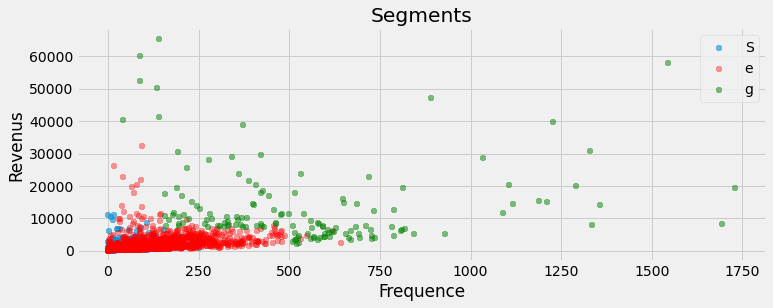

In [100]:
df_graph = df_clients.query("Revenus < 80000 and Frequence < 2000")

plt.scatter( x = df_graph.query("Segment == 'Valeur faible'")['Frequence']
            ,y = df_graph.query("Segment == 'Valeur faible'")['Revenus']
            ,marker = "+"
           ,alpha=0.6)

plt.scatter( x = df_graph.query("Segment == 'Valeur moyenne'")['Frequence']
            ,y = df_graph.query("Segment == 'Valeur moyenne'")['Revenus']
            ,marker = "+"
            ,color = 'red'
            ,alpha=0.4)

plt.scatter( x = df_graph.query("Segment == 'Valeur forte'")['Frequence']
            ,y = df_graph.query("Segment == 'Valeur forte'")['Revenus']
            ,marker = "+"
            ,color = 'green'
            ,alpha=0.5)

plt.xlabel('Frequence')
plt.ylabel('Revenus')
plt.title('Segments')
plt.legend('')

Text(0.5, 1.0, 'Segments')

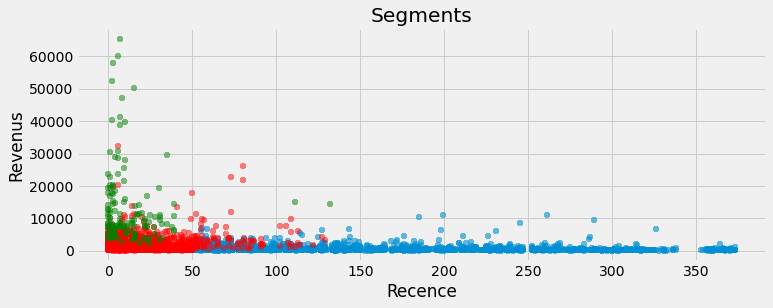

In [94]:
plt.scatter( x = df_graph.query("Segment == 'Valeur faible'")['Recence']
            ,y = df_graph.query("Segment == 'Valeur faible'")['Revenus']
            ,marker = "+"
           ,alpha=0.6)

plt.scatter( x = df_graph.query("Segment == 'Valeur moyenne'")['Recence']
            ,y = df_graph.query("Segment == 'Valeur moyenne'")['Revenus']
            ,marker = "+"
            ,color = 'red'
            ,alpha=0.5)

plt.scatter( x = df_graph.query("Segment == 'Valeur forte'")['Recence']
            ,y = df_graph.query("Segment == 'Valeur forte'")['Revenus']
            ,marker = "+"
            ,color = 'green'
            ,alpha=0.5)

plt.xlabel('Recence')
plt.ylabel('Revenus')
plt.title('Segments')

Text(0.5, 1.0, 'Segments')

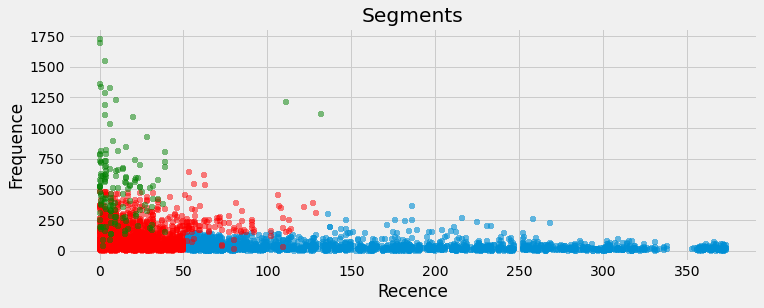

In [95]:
plt.scatter( x = df_graph.query("Segment == 'Valeur faible'")['Recence']
            ,y = df_graph.query("Segment == 'Valeur faible'")['Frequence']
            ,marker = "+"
           ,alpha=0.6)

plt.scatter( x = df_graph.query("Segment == 'Valeur moyenne'")['Recence']
            ,y = df_graph.query("Segment == 'Valeur moyenne'")['Frequence']
            ,marker = "+"
            ,color = 'red'
            ,alpha=0.5)

plt.scatter( x = df_graph.query("Segment == 'Valeur forte'")['Recence']
            ,y = df_graph.query("Segment == 'Valeur forte'")['Frequence']
            ,marker = "+"
            ,color = 'green'
            ,alpha=0.5)

plt.xlabel('Recence')
plt.ylabel('Frequence')
plt.title('Segments')

In [74]:
fig = px.scatter_3d(df_graph, x='Recence', y='Frequence', z='Revenus',
              color='Segment')
fig.show()

## Conclusion

A travers ce notebook, j'ai pu mettre en contraste 3 groupes de clients en se basant sur la recence, la frequence et le montant de leurs achats.
Une meilleure connaissance des clients permet un marketing ciblé et donc plus efficace.